In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_for_prediction_df = pd.read_csv(r'E:\PROJECT-AI-ML\BCG X Data Science\data_for_predictions.csv')

# Display the first few rows of each dataset
print("\nData for prediction:")
print(data_for_prediction_df.head())


Data for prediction:
   Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data_for_prediction_df = pd.read_csv(r'E:\PROJECT-AI-ML\BCG X Data Science\data_for_predictions.csv')

# Display the first few rows of the dataset
print("\nData for prediction:")
display(data_for_prediction_df.head())


Data for prediction:


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [5]:
# Drop columns not needed for prediction (e.g., identifier columns)
data_for_prediction_df = data_for_prediction_df.drop(columns=['Unnamed: 0', 'id'])

# Define features and target variable
features = data_for_prediction_df.drop(columns=['churn'])
target = data_for_prediction_df['churn']

# Display the first few rows of features and target
print("Features:")
display(features.head())
print("Target:")
display(target.head())

Features:


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


Target:


0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Display the shapes of the train and test sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (10224, 61)
Testing features shape: (4382, 61)
Training target shape: (10224,)
Testing target shape: (4382,)


In [7]:
# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Display a message indicating training completion
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


In [8]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Display the first few predictions
print("Predictions:")
display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())

Predictions:


,Actual,Predicted
4947,0,0
5868,0,0
6805,0,0
1323,0,0
11759,0,0


Confusion Matrix:


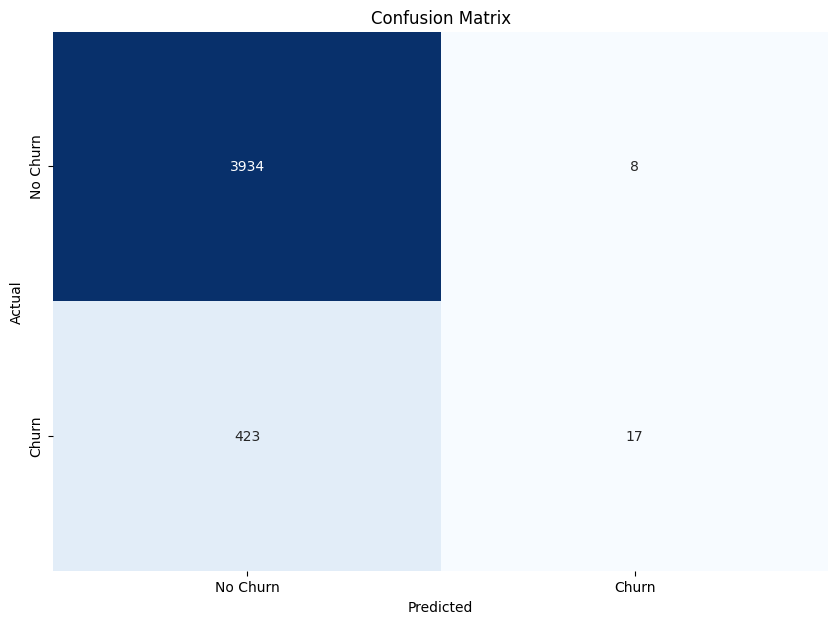

In [9]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Compute and display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.68      0.04      0.07       440

    accuracy                           0.90      4382
   macro avg       0.79      0.52      0.51      4382
weighted avg       0.88      0.90      0.86      4382



In [11]:
# Compute and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.90



Data for prediction:


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


Features:


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,71,9,1,0,0,0,0,1,0,0


Target:


0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

Training features shape: (10224, 61)
Testing features shape: (4382, 61)
Training target shape: (10224,)
Testing target shape: (4382,)
Random Forest Classifier trained successfully.
Predictions:


,Actual,Predicted
4947,0,0
5868,0,0
6805,0,0
1323,0,0
11759,0,0


Confusion Matrix:


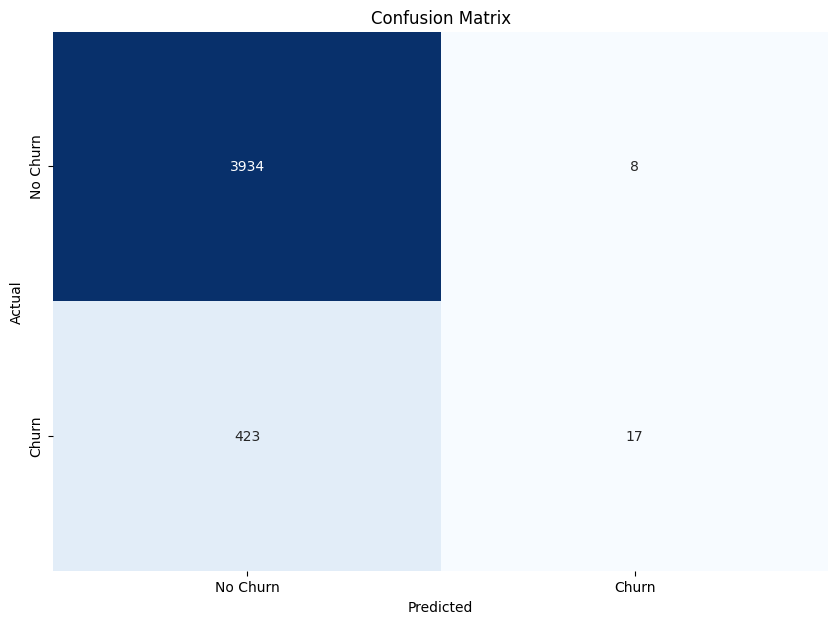

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.68      0.04      0.07       440

    accuracy                           0.90      4382
   macro avg       0.79      0.52      0.51      4382
weighted avg       0.88      0.90      0.86      4382

Accuracy Score: 0.90


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data_for_prediction_df = pd.read_csv(r'E:\PROJECT-AI-ML\BCG X Data Science\data_for_predictions.csv')

# Display the first few rows of the dataset
print("\nData for prediction:")
display(data_for_prediction_df.head())

# Drop columns not needed for prediction (e.g., identifier columns)
data_for_prediction_df = data_for_prediction_df.drop(columns=['Unnamed: 0', 'id'])

# Define features and target variable
features = data_for_prediction_df.drop(columns=['churn'])
target = data_for_prediction_df['churn']

# Display the first few rows of features and target
print("Features:")
display(features.head())
print("Target:")
display(target.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Display the shapes of the train and test sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Display a message indicating training completion
print("Random Forest Classifier trained successfully.")

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Display the first few predictions
print("Predictions:")
display(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute and display the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Compute and display the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")